In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rafifmusyaffa","key":"1907106c4c25a4618c60085293610037"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d mssmartypants/water-quality

  0% 0.00/258k [00:00<?, ?B/s]
100% 258k/258k [00:00<00:00, 74.2MB/s]


In [ ]:
!mkdir data-water
!unzip water-quality.zip -d data-water
!ls data-water

Archive:  water-quality.zip
  inflating: data-water/waterQuality1.csv  
waterQuality1.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [ ]:
df =pd.read_csv('data-water/waterQuality1.csv')

In [ ]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
df.shape

(7999, 21)

In [ ]:
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

<Axes: >

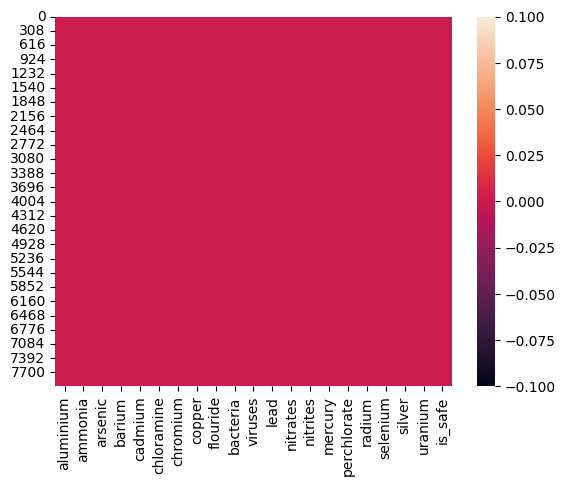

In [ ]:
sns.heatmap(df.isnull())

<ipython-input-13-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

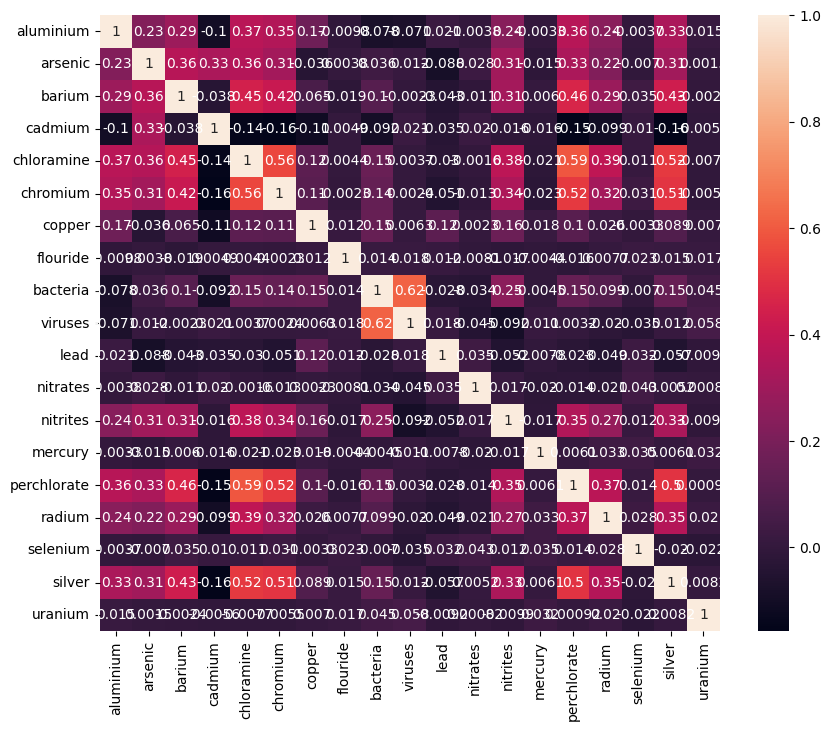

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

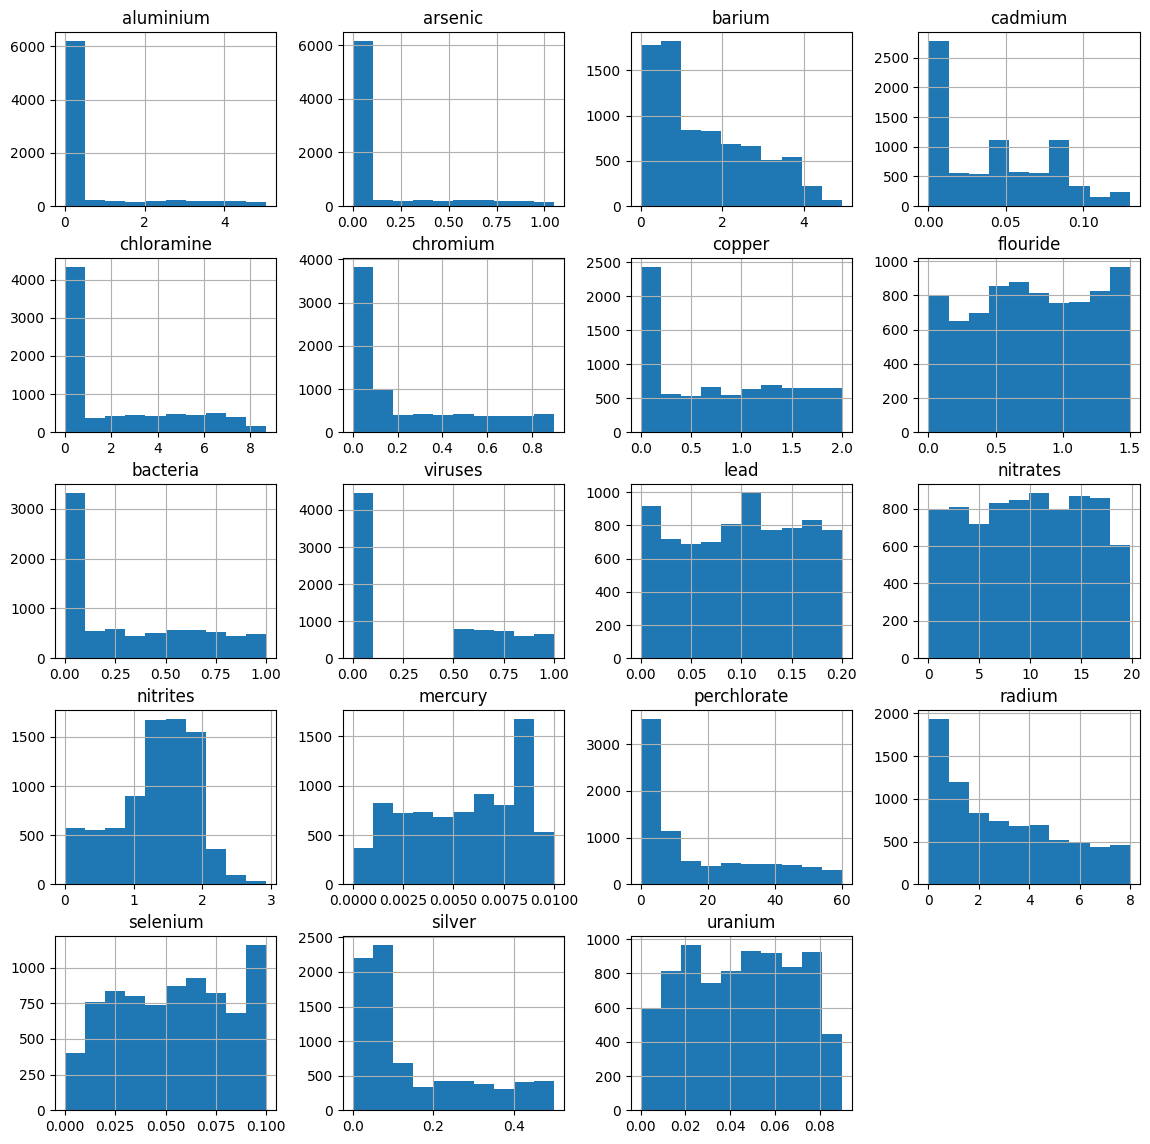

In [ ]:
df.hist(figsize=(14, 14))
plt.show()

# Mengechek dan menghapus data NUM

In [ ]:
#Check if dataset has missing values

cek_nilai_hilang = df.isnull().any().any()

if cek_nilai_hilang:
    print("The dataset has missing values.")
else:
    print("The dataset has no missing values.")

The dataset has no missing values.


In [ ]:
df = df[~df.applymap(lambda x: x == '#NUM!').any(axis=1)]


# memisahkan data dan label

In [ ]:

X = df.drop (columns='is_safe', axis=1)
Y = df['is_safe']

In [ ]:
print(X)

      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \
0       0.17      

In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7996, dtype: object


# Standarisasi Data

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standarized_data = scaler.transform(X)

In [ ]:
print(standarized_data)

[[ 0.77740287 -0.58549134 -0.48087476 ...  1.05369443  1.33873624
  -0.91704015]
 [ 1.30694501  0.77511802 -0.59963176 ...  1.05369443  0.85113427
   0.19802266]
 [ 0.27157158 -0.02908321 -0.48087476 ...  0.70612871  2.03531047
  -1.28872776]
 ...
 [-0.45556091 -0.83666343 -0.63921743 ... -1.72683135 -0.75098648
   0.19802266]
 [-0.51878982 -0.48186877 -0.59963176 ... -1.72683135 -1.02961617
  -1.66041536]
 [-0.49507898 -0.83666343 -0.59963176 ... -1.72683135 -0.75098648
   0.19802266]]


In [ ]:
X = standarized_data
Y = df['is_safe']

In [ ]:
print(X)
print(Y)

[[ 0.77740287 -0.58549134 -0.48087476 ...  1.05369443  1.33873624
  -0.91704015]
 [ 1.30694501  0.77511802 -0.59963176 ...  1.05369443  0.85113427
   0.19802266]
 [ 0.27157158 -0.02908321 -0.48087476 ...  0.70612871  2.03531047
  -1.28872776]
 ...
 [-0.45556091 -0.83666343 -0.63921743 ... -1.72683135 -0.75098648
   0.19802266]
 [-0.51878982 -0.48186877 -0.59963176 ... -1.72683135 -1.02961617
  -1.66041536]
 [-0.49507898 -0.83666343 -0.59963176 ... -1.72683135 -0.75098648
   0.19802266]]
0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7996, dtype: object


# Memisahkan Data Training dan Data Testing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7996, 20) (6396, 20) (1600, 20)


# Membuat data latih menggunakan algoritma SVM


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# membuat model evaluasi untuk mengukur tingkat akurasi

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.9052532833020638


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.91125


In [ ]:
input_data = (1.65, 1.65, 0.04, 2.85, 0.007, 0.35, 0.83, 0.17,0.05,0.2,0,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Air tidak Aman')
else :
    print('Air Aman')

In [ ]:
import pickle
filename = 'water_model.sav'
pickle.dump(classifier, open(filename,'wb'))